In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from subprocess import check_output
from datetime import datetime
import time

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Plot styling and display options
sns.set(style='white', context='notebook', palette='deep')
plt.rcParams[ 'figure.figsize' ] = 10 , 6

pd.set_option('display.max_columns', 100) # Print 100 Pandas columns

# Special distribution plot (will be used later)
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()
    plt.tight_layout()

In [3]:
#import data

df = pd.read_csv("/Users/sangbin.cho/Downloads/google_trend_ten_years.csv")

#/Users/teddysun/Desktop/combined_data_2013_1_1_2017_12_1.csv

In [4]:
#drop unnamed row
df = df.drop("DATE", axis=1)
df = df.drop("strawberries", axis=1)
df = df.drop("pumpkin", axis=1)
df.head()



,beer,TIMESTAMP,Month,day_of_week,is_weekend,Winter,Spring,Summer,Fall
0,89,1199145600,1,1,0,1,0,0,0
1,47,1199232000,1,2,0,1,0,0,0
2,76,1199318400,1,3,0,1,0,0,0
3,45,1199404800,1,4,0,1,0,0,0
4,82,1199491200,1,5,1,1,0,0,0


In [5]:
#adding actual_number_sold column 
actual_beer_sold = round(df['beer']/2 + np.random.normal(0,5,len(df['beer'])))  

df['actual_beer_sold'] = actual_beer_sold
df.head()


,beer,TIMESTAMP,Month,day_of_week,is_weekend,Winter,Spring,Summer,Fall,actual_beer_sold
0,89,1199145600,1,1,0,1,0,0,0,42.0
1,47,1199232000,1,2,0,1,0,0,0,28.0
2,76,1199318400,1,3,0,1,0,0,0,32.0
3,45,1199404800,1,4,0,1,0,0,0,18.0
4,82,1199491200,1,5,1,1,0,0,0,42.0


# Data Analysis - Principle Component Analysis

In [6]:
df.describe()

,beer,TIMESTAMP,Month,day_of_week,is_weekend,Winter,Spring,Summer,Fall,actual_beer_sold
count,3653.000000,3.653000e+03,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000
mean,67.596496,1.356912e+09,6.522310,3.000821,0.285792,0.246647,0.252669,0.251574,0.249658,33.716397
std,15.227961,9.112388e+07,3.449345,1.999931,0.451853,0.431118,0.434602,0.433977,0.432874,9.171814
min,25.000000,1.199146e+09,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,56.000000,1.278029e+09,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
50%,66.000000,1.356912e+09,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
75%,78.000000,1.435795e+09,10.000000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,40.000000
max,100.000000,1.514678e+09,12.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,62.000000


In [7]:
df.corr()

,beer,TIMESTAMP,Month,day_of_week,is_weekend,Winter,Spring,Summer,Fall,actual_beer_sold
beer,1.000000,-0.010865,0.105532,0.438992,0.442413,0.025299,-0.022738,0.010103,-0.001994,0.837812
TIMESTAMP,-0.010865,1.000000,0.099837,0.001186,0.001200,-0.022268,-0.041985,0.008766,0.058419,0.001877
Month,0.105532,0.099837,1.000000,-0.002206,-0.001632,-0.234883,-0.416114,0.082863,0.582377,0.114380
day_of_week,0.438992,0.001186,-0.002206,1.000000,0.790597,0.000718,0.002912,-0.001816,-0.000869,0.369284
is_weekend,0.442413,0.001200,-0.001632,0.790597,1.000000,-0.000701,0.003086,-0.000898,-0.000900,0.372453
Winter,0.025299,-0.022268,-0.234883,0.000718,-0.000701,1.000000,-0.332704,-0.331739,-0.325649,0.008693
Spring,-0.022738,-0.041985,-0.416114,0.002912,0.003086,-0.332704,1.000000,-0.312434,-0.335400,-0.036974
Summer,0.010103,0.008766,0.082863,-0.001816,-0.000898,-0.331739,-0.312434,1.000000,-0.332969,0.015384
Fall,-0.001994,0.058419,0.582377,-0.000869,-0.000900,-0.325649,-0.335400,-0.332969,1.000000,0.018114
actual_beer_sold,0.837812,0.001877,0.114380,0.369284,0.372453,0.008693,-0.036974,0.015384,0.018114,1.000000


Text(0.5,1,'Correlation between different fearures')

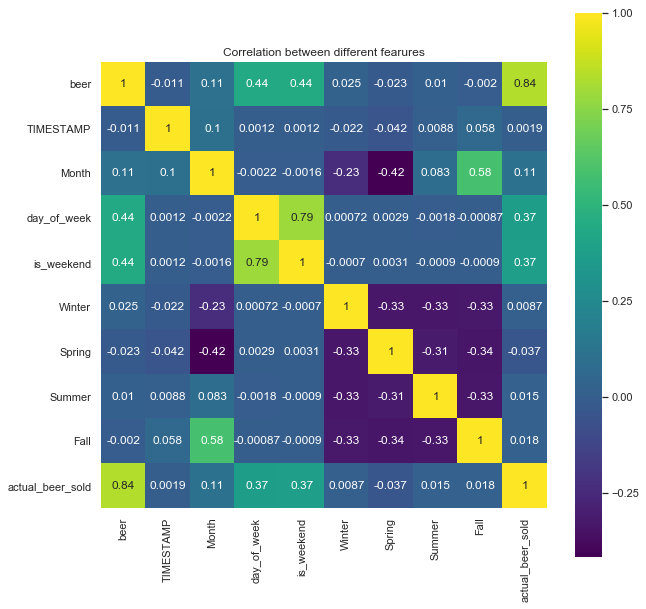

In [8]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

# Random Forest Regressor

In [9]:
# Extract the training and test data

data = df.values
X = data[:,0:9]  # all rows, no label
y = data[:, 9]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Scale the data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# Establish model
RFR_model = RandomForestRegressor(n_jobs=-1)

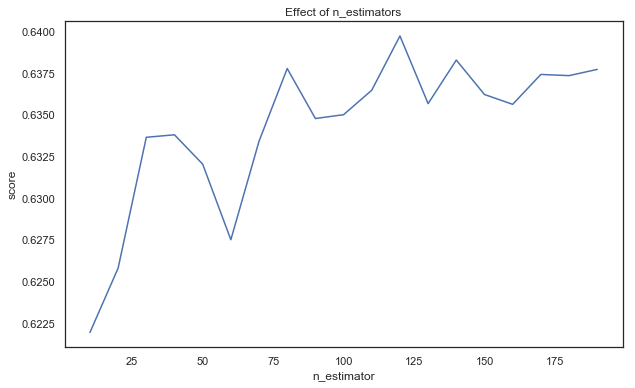

In [12]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    RFR_model.set_params(n_estimators=n)
    RFR_model.fit(X_train, y_train)
    scores.append(RFR_model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Support Vector Regression

In [13]:
# Establish model
SVR_model = SVR(C=1, cache_size=500, epsilon=1, kernel='rbf')

In [14]:
#Try many epsilons
epsilons = np.arange(1, 100)
scores = []
#for e in epsilons:
SVR_model.set_params(epsilon=1)
SVR_model.fit(X_train, y_train)
print(X_test)
# pred = SVR_model.predict(X_test)
#     #scores.append(SVR_model.score(X_test, y_test))

# x = [x_t for x_t in df['TIMESTAMP']][3653-914:]
#plt.plot(x, pred, '-', ms=16)
# plt.plot(epsilons, scores)
# plt.title("Epsilon effect")
# plt.xlabel("epsilon")
# plt.ylabel("score")
# plt.show()

[[ 2.13815047 -0.50756804  0.42456821 ... -0.58367412  1.7520949
  -0.5819877 ]
 [-0.09836981 -0.1633878   0.42456821 ... -0.58367412  1.7520949
  -0.5819877 ]
 [-1.01928993 -1.5410622   0.42456821 ... -0.58367412  1.7520949
  -0.5819877 ]
 ...
 [-0.22992983 -0.83935399  0.42456821 ... -0.58367412  1.7520949
  -0.5819877 ]
 [-1.01928993  1.38399321 -1.59936174 ... -0.58367412 -0.57074534
  -0.5819877 ]
 [-1.47974998 -1.45620889  1.29196676 ... -0.58367412 -0.57074534
   1.71824939]]


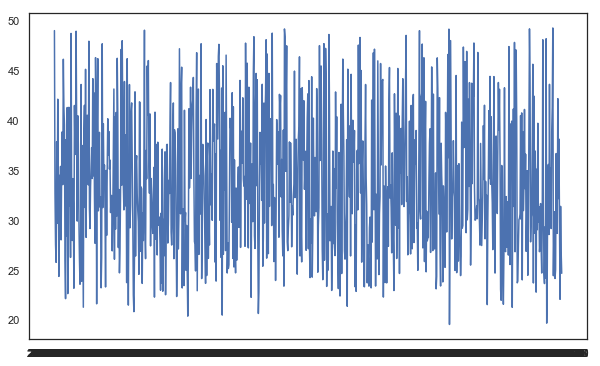

In [15]:
class InventoryModel:
    def __init__(self, model=SVR, label='y'):
        self.columns = []
        self.dataframe = None
        self.model_type = model
        self.model = None
        self.label = label
        self.read_file = []

    def feed_csv(self, path, columns=[]):
        if 'DATE' not in columns:
            raise Exception("Include DATE as a field")

        if path in self.read_file:
            raise Exception("You cannot read the same file twice. {} is already fed to this class".format(path))

        # update column
        self.columns += columns

        # read data
        csv_manager = CSVManager(path)
        csv_data = csv_manager.read()

        csv_data_len = int(len(csv_data))

        def create_data_frame(csv_data, df):
            # get data per column to feed dataframe
            data_per_column = []
            for column in columns:
                # timestamp is handled specially
                if column == 'DATE':
                    timestamps = [datetime.datetime.strptime(data['DATE'], "%Y-%m-%d").month * 100
                                  + datetime.datetime.strptime(data['DATE'], "%Y-%m-%d").day
                                  for data in csv_data]
                    data_per_column.append(timestamps)
                elif column == 'TRANSACTION':
                    data_at_column = [int(data['STRAWBERRIES']) + random.randint(-3, 3) for data in csv_data]
                    data_per_column.append(data_at_column)
                else:
                    data_at_column = [int(data[column]) for data in csv_data]
                    data_per_column.append(data_at_column)

            # merge new dataframe to the previous dataframe
            new_dataframe = pd.DataFrame(np.column_stack(data_per_column), columns=columns)
            if df is None:
                return new_dataframe
            else:
                return pd.merge(df, new_dataframe, on='DATE')

        # training_data ==================================================
        self.dataframe = create_data_frame(csv_data, self.dataframe)

        self.read_file.append(path)

    def train(self, x_train, y_train,  C=1, cache_size=500, epsilon=1, kernel='rbf'):
        self.model = self.model_type(C=C, cache_size=cache_size, epsilon=epsilon, kernel=kernel)
        features = x_train

        # normalize the value
        scaler = StandardScaler()
        scaler.fit(features)
        features = scaler.transform(features)

        self.cof = self.model.fit(features, y_train)

    def predict(self, features):
        if self.model is None:
            raise Exception("model is not trained")

        return self.model.predict(features)


    def get_coef(self):
        if self.model == None:
            raise Exception("model hasn't been trained")

        return self.cof.coef_


    def get_dataframe(self):
        if self.dataframe is None:
            raise Exception("dataframe has not been defined")

        return self.dataframe


    def get_inventory_type(self):
        return self.inventory_type

inventory_model = InventoryModel(model=SVR, label='actual_beer_sold')
inventory_model.dataframe = X_train
inventory_model.train(X_train, y_train, C=1, cache_size=500, epsilon=1, kernel='rbf')

df['actual_beer_sold'] = actual_beer_sold
prediction = inventory_model.predict(X_test)
from datetime import datetime

x = [datetime.utcfromtimestamp(x_t).strftime('%Y-%m-%d') for x_t in df['TIMESTAMP']][3653-914:]
plt.plot(x, prediction, '-', ms=16)



# Lasso Regression

In [16]:
Lasso_Model = linear_model.Lasso(alpha=0.1)

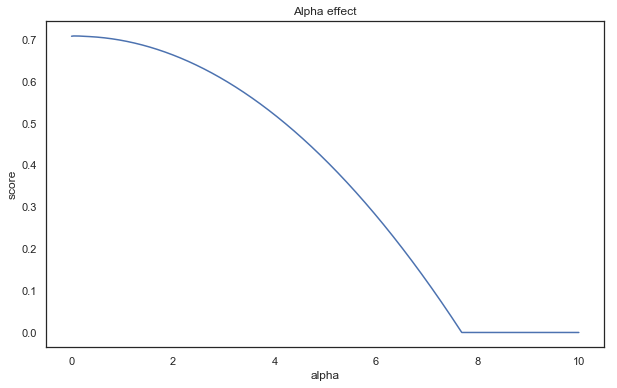

In [17]:
alphas = np.linspace(0.000001, 10, 10000)
scores = []
for a in alphas:
    Lasso_Model.set_params(alpha=a)
    Lasso_Model.fit(X_train, y_train)
    scores.append(Lasso_Model.score(X_test, y_test))
plt.plot(alphas, scores)
plt.title("Alpha effect")
plt.xlabel("alpha")
plt.ylabel("score")
plt.show()

# [0.00000000001, 0.0000000001, 0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

# Elastic Net

In [18]:
EN_Model = ElasticNet()

In [19]:
[LinearRegression,Ridge,Lasso,ElasticNet,KNeighborsRegressor,DecisionTreeRegressor,SVR,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor]:

SyntaxError: invalid syntax (<ipython-input-19-7381aae897ff>, line 1)